# Case Study: Fashion Classification and Anomaly Detection Using CNNs and Autoencoders

## Introduction

In this case study, we explore the **Fashion-MNIST dataset**, a modern replacement for the classic MNIST digits dataset. Fashion-MNIST contains **70,000 grayscale images** (28×28 pixels) of clothing items across **10 categories**, including T-shirts, sneakers, and handbags. Its balance of simplicity and practical relevance makes it an excellent choice for deep learning experimentation.

The case study is organized into two parts:

1. **Image Classification** – Build a Convolutional Neural Network (CNN) to classify images into one of the ten categories.  
2. **Anomaly Detection** – Train Autoencoders and Variational Autoencoders (VAEs) to detect and flag unusual or outlier patterns in the dataset.

Along the way, we will:
- Preprocess and load image data into a machine learning workflow.
- Build advanced deep learning models like CNNs and Autoencoders.
- Apply essential techniques such as data augmentation, regularization, and feature extraction.
- Learn how reconstruction error can highlight anomalies in visual datasets.  

The techniques developed here can be extended to real-world applications such as **e-commerce product classification**, **quality inspection in manufacturing**, and **medical imaging anomaly detection**.

## Objective

1. Classification: Develop a CNN-based model to classify clothing items into one of 10 categories.
2. Anomaly Detection: Use Autoencoders to identify anomalous items, such as corrupted images or those deviating from the standard style.

## Dataset Overview

The Fashion MNIST dataset consists of:

- 10 Classes: T-shirts, trousers, pullovers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots.
- Images: 70,000 grayscale images, each 28x28 pixels.
- Data Split:
 - 60,000 training images
 - 10,000 test images


## Task 1: Image Classification with CNNs

We will build a CNN image-classification pipeline in three stages: load & inspect the data (quick EDA), preprocess it (normalize/reshape), then train and evaluate the model (optional feature engineering in between).

### Extract the Dataset

The Fashion MNIST dataset contains 70,000 grayscale images across 10 categories of fashion items. Let’s first load and visualize the data.

2025-08-20 17:40:34.307534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 7s 2us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
Testing data shape: (10000, 28, 28), Labels shape: (10000,)


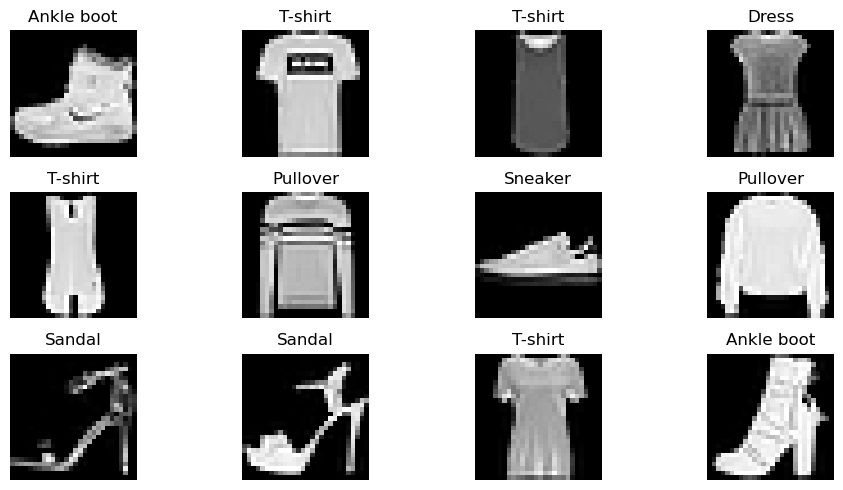

In [1]:
# Import necessary libraries
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display the data shape
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Visualize some images from the dataset
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

After executing the code, we see that the Fashion MNIST dataset has 60,000 training images and 10,000 test images, each sized 28×28 pixels. The labels represent 10 fashion categories like T-shirts, trousers, and sneakers. A grid of 12 sample images with their labels is shown, giving us a quick view of the dataset and setting the stage for preprocessing and modeling.

### Transform the Data

Normalize pixel values to a range of [0, 1].
Reshape the images to include a channel dimension (required for CNNs).


In [2]:
# Normalize pixel values to [0, 1]
# Scale pixel values from 0–255 to 0–1 for faster training
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to include a channel dimension
# Reshape images to (height, width, channels); channel=1 for grayscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Show the final shape of training data
print(f"New training data shape: {x_train.shape}")

New training data shape: (60000, 28, 28, 1)


After preprocessing, the pixel values of the Fashion MNIST images are scaled to the range [0, 1] for better model performance. The data is also reshaped from (28, 28) to (28, 28, 1) to add a channel dimension, which is required by CNNs. The output shape (60000, 28, 28, 1) confirms the training data is now ready for model training.

### Exploratory Data Analysis (EDA)

Before we start building the model, we need to first understand the dataset. Exploratory Data Analysis (EDA) allows us to explore the data, spot patterns, and check for issues like missing values or uneven class distribution. For this case study, we’ll carry out some simple EDA on the Fashion MNIST dataset.

#### **Step1:** Analyzing Class Distribution

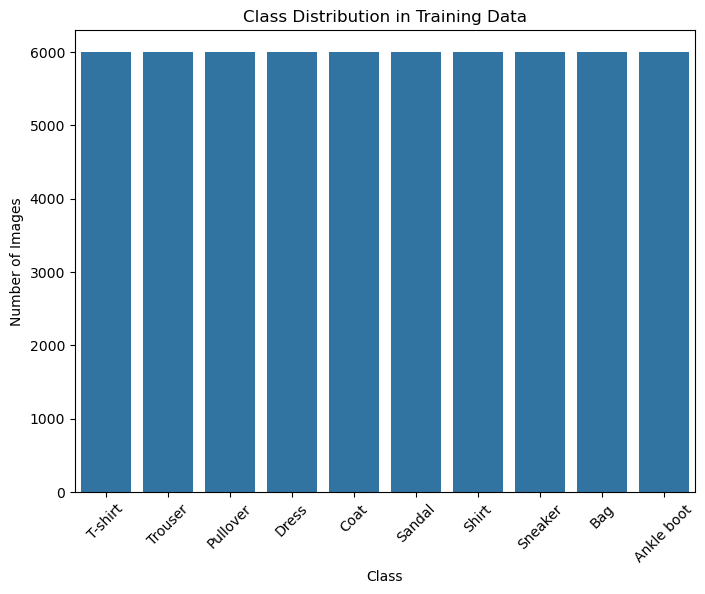

In [3]:
# Plot class distribution in the training set
# Import seaborn for easy visualization
import seaborn as sns

# Create a bar chart showing how many images each class has in the training set
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)

# Replace numeric labels (0–9) with class names (e.g., T-shirt, Sneaker, etc.)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)

# Add title and axis labels for clarity
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# Display the plot
plt.show()


We use Seaborn’s countplot to visualize how often each class appears in the training data. This helps us check if the dataset is balanced. If one class has many more examples than others, the model might lean toward predicting that class more often. Ideally, the classes should appear in similar numbers for fair training.

#### **Step2:** Summary Statistics

To gain further insights, let’s look at some summary statistics of the dataset, including the mean and standard deviation of the pixel values. This helps us understand the range of values our images have, which could inform preprocessing decisions.

In [6]:
# Calculate summary statistics for pixel values
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Mean of training images: {np.mean(x_train)}")   # Average pixel intensity (brightness) - used for normalization
print(f"Standard deviation of training images: {np.std(x_train)}")  # Spread of pixel values (contrast) - helps decide if standardization is needed


Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Mean of training images: 0.2860405969887955
Standard deviation of training images: 0.35302424451492237


This code finds the average and spread of pixel values in the training images. These numbers help decide if we should normalize or standardize the data, so that pixel values are on a consistent scale. Doing this makes model training more stable and often faster.

In our case, the mean is about 0.28 and the standard deviation is about 0.35.
These values show that pixel intensities are mostly below the midpoint of the 0–1 scale, with moderate variation. This confirms normalization was applied correctly and gives us a baseline understanding of the dataset’s distribution before model training.

#### **Step3:** Checking for Missing or Corrupt Data

In [11]:
# Check for missing values in the training and test data
print(f"Missing values in training data: {np.sum(np.isnan(x_train))}")
print(f"Missing values in test data: {np.sum(np.isnan(x_test))}")

Missing values in training data: 0
Missing values in test data: 0


This simple check helps us ensure there are no missing values in the training or test sets. While the Fashion MNIST dataset is clean by design, this step is essential when working with other datasets, as missing values can cause errors during model training.

#### **Step4:** Visualizing the Distribution of Pixel Intensity
Finally, we can look at the distribution of pixel values in the dataset. Since the images are grayscale, the pixel values range from 0 (black) to 255 (white). Visualizing the distribution can help us understand the contrast in the images and whether we need to adjust the range for the model.

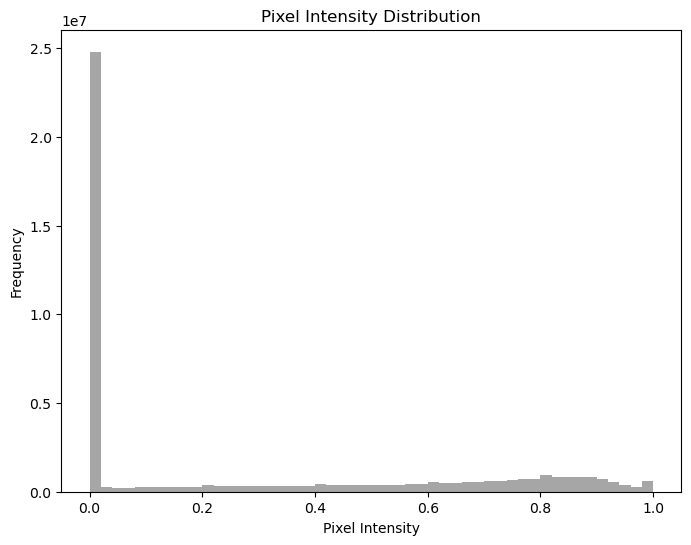

In [19]:
# Create a figure of size 8x6 inches
plt.figure(figsize=(8, 6))

# Flatten all training images into a 1D array of pixel values
pixels = x_train.flatten()

# Plot histogram to show how pixel intensities are distributed
plt.hist(pixels, bins=50, color='gray', alpha=0.7)

# Add title and axis labels for clarity
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


This code converts the 28x28 images into a single long array and plots a histogram of pixel values. It shows how the intensities are spread across the dataset. Most pixel values fall between 0.0 and 0.1, meaning many background pixels are nearly black. Brighter pixels correspond to the actual clothing shapes.

#### Conclusion

The EDA process provides a valuable foundation for building a model. By visualizing the dataset, checking class distributions, and understanding the pixel value distributions, we ensure that the model is trained on clean, balanced, and appropriately scaled data. This exploration gives us the confidence to proceed with model building, knowing that the data is ready for use in training and evaluation.

### Feature Engineering

#### Step 1: Encoding Categorical Variables
**One-Hot Encode the Labels:** One-hot encoding converts class labels into a binary matrix format for use in classification models.

In [22]:
from tensorflow.keras.utils import to_categorical

# Convert numeric labels (0–9) into one-hot encoded vectors for classification
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Display an example of the transformed label
print(f"Sample one-hot encoded label: {y_train[0]}")


Sample one-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


After this step, the Fashion MNIST labels are turned into one-hot vectors of length 10 (one slot for each class). In these vectors, the correct class is marked with 1 while the rest are 0. For example, the first training label is shown as such a vector. This format matches the neural network’s output layer and makes multi-class classification work properly.

#### Step 2: Data Augmentation

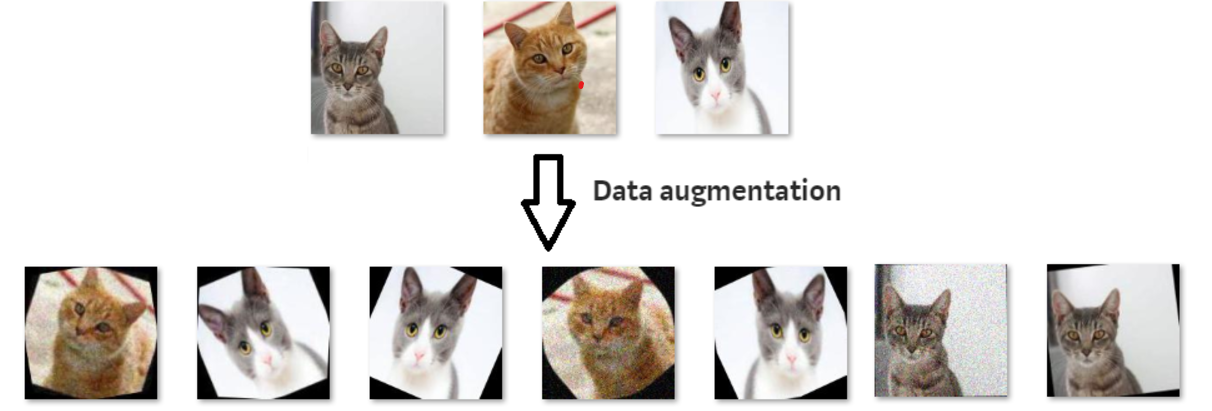

To improve generalization and prevent overfitting, apply augmentation techniques like rotation and flipping.

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation to create varied training samples
datagen = ImageDataGenerator(
    rotation_range=10,      # Randomly rotate images (±10 degrees)
    width_shift_range=0.1,  # Shift images horizontally by 10%
    height_shift_range=0.1, # Shift images vertically by 10%
    horizontal_flip=False   # No left-right flipping (not suitable for clothes)
)

# Adapt generator to the training data (needed for some augmentations)
datagen.fit(x_train)

The code uses ImageDataGenerator to add variety to the training images. It creates small changes like rotating images up to 10 degrees and shifting them slightly in height or width (up to 10%). These variations make the dataset larger and more diverse. By fitting the generator on the training set, the model sees different versions of the same images during training, which helps it generalize better and lowers the chance of overfitting.

Baseline model (simple approach for comparison).

Experiment with different architectures/algorithms.

Hyperparameter tuning.


### Model Training and Evaluation

#### Step 1: Initialize the MLP Model


We’ll construct a CNN with:
- Convolutional layers for feature extraction.
- MaxPooling layers for down-sampling.
- Dropout for regularization.
- Fully connected layers for classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN model step by step
cnn_model = Sequential([
    # First conv layer: 32 filters of size 3x3, ReLU activation, input is 28x28 grayscale image
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Downsample using max pooling (2x2 window)
    MaxPooling2D((2, 2)),

    # Second conv layer: 64 filters of size 3x3
    Conv2D(64, (3, 3), activation='relu'),

    # Another max pooling layer
    MaxPooling2D((2, 2)),

    # Flatten feature maps into a 1D vector
    Flatten(),

    # Fully connected layer with 128 neurons
    Dense(128, activation='relu'),

    # Dropout to reduce overfitting (50% of neurons dropped during training)
    Dropout(0.5),

    # Output layer: 10 neurons (one per class) with softmax for probabilities
    Dense(10, activation='softmax')
])

# Compile model: Adam optimizer, categorical crossentropy loss, track accuracy
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Show a summary of the model layers and parameters
cnn_model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

This code builds a Convolutional Neural Network (CNN) using the Sequential API. It begins with two convolutional layers (with ReLU activation), each followed by max pooling to shrink the feature maps while keeping important details. The output is then flattened and passed through a dense layer with 128 neurons and ReLU activation. A dropout layer is added to reduce overfitting. Finally, the output layer uses softmax to classify the input into 10 fashion categories. The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the metric. Calling summary() shows the full architecture along with trainable parameters, preparing the model for training.

#### Step 2: Train the Model
We will train the CNN for 10 epochs using a batch size of 64, while applying the augmented data generator.

In [26]:
# Train the CNN using augmented training data
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # generates batches of augmented images
    epochs=10,                                      # number of training iterations
    validation_data=(x_test, y_test)                # evaluate performance on test data
)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.7060 - loss: 0.7833 - val_accuracy: 0.7974 - val_loss: 0.5158
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.7817 - loss: 0.5797 - val_accuracy: 0.8399 - val_loss: 0.4222
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8099 - loss: 0.5127 - val_accuracy: 0.8497 - val_loss: 0.3962
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8242 - loss: 0.4737 - val_accuracy: 0.8671 - val_loss: 0.3542
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.8378 - loss: 0.4364 - val_accuracy: 0.8605 - val_loss: 0.3639
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.8459 - loss: 0.4153 - val_accuracy: 0.8777 - val_loss: 0.3305
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8530 - loss: 0.4006 - val_accuracy: 0.8799 - val_loss: 0.3203
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8564 - loss: 0.3890 - val_accurac

The code trains the CNN model using batches of augmented images (batch size 64) generated by ImageDataGenerator over 10 epochs. Augmentation helps the model generalize better by exposing it to varied versions of the training data. Validation is done on the original test set to check performance on unseen data. The history object stores accuracy and loss for both training and validation across epochs, which can be used to track learning progress.

#### Step 3: Evaluate the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8831 - loss: 0.3104
Test Loss: 31.04%, Test Accuracy: 88.31%


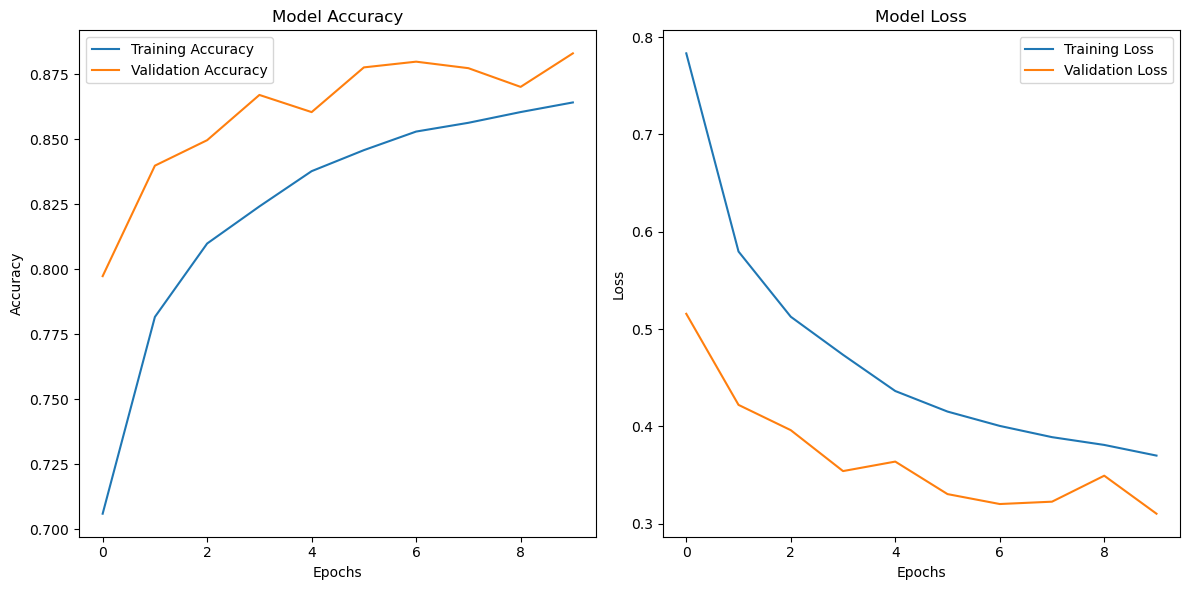

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%")

# Visualize training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

The code checks the trained CNN model on the test dataset to measure how well it performs on new images. The test accuracy is printed as a percentage, giving a straightforward measure of the model’s performance.

The training history is also visualized through two plots:

1. **Accuracy Plot**: Shows training and validation accuracy across epochs, helping track how prediction performance improves.

2. **Loss Plot**: Shows training and validation loss across epochs, indicating how well the model reduced errors.

These plots make it easier to spot issues such as overfitting or underfitting and give insights into how the model learned during training.

#### Step 4: Analyze Predictions

Visualize predictions on some test samples using Grad-CAM or simple label matching.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


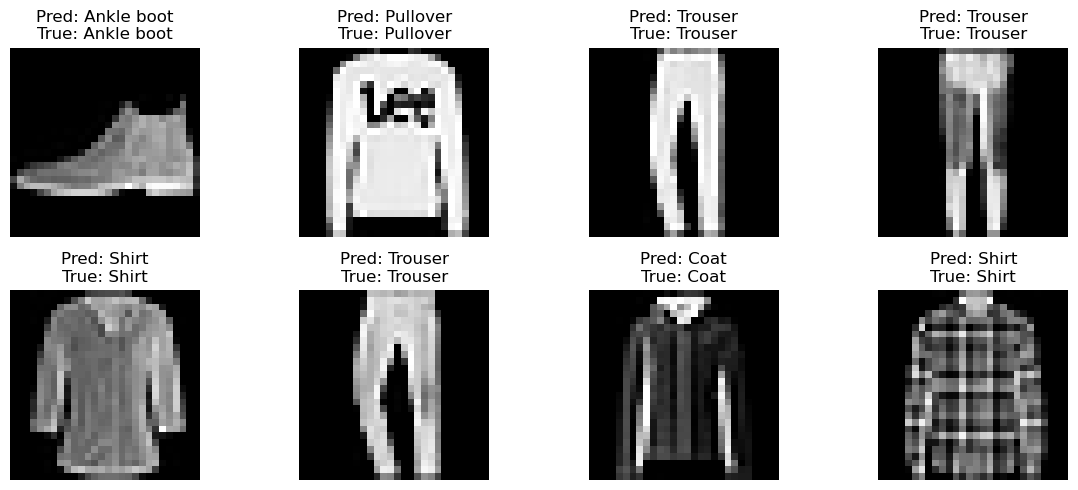

In [31]:
# Use the trained model to predict class probabilities for all test images
predictions = cnn_model.predict(x_test)

# Convert predicted probabilities into actual class labels (highest probability = predicted class)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels into class labels
true_classes = np.argmax(y_test, axis=1)

# Plot a few test images with their predicted and true labels
plt.figure(figsize=(12, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)  # Create a 2x4 grid of plots
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Show the image
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
    plt.axis('off')  # Hide axes for clarity
plt.tight_layout()
plt.show()


The code uses the trained CNN model to predict labels for the test images. The predict() method gives probabilities for all 10 categories, and np.argmax() is applied to pick the class with the highest probability. Similarly, the actual class labels are extracted from y_test using np.argmax().

To check results visually, 8 test images are displayed with their predicted and true labels. This makes it easy to see how well the model is classifying individual samples and whether the predictions match the real categories.

### Conclusion

We developed a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset, achieving good accuracy through careful preprocessing, data augmentation, and model design. Convolutional layers helped capture important image features, while pooling layers reduced complexity and improved efficiency. This project gave hands-on experience with deep learning workflows and their use in computer vision. As a next step, more advanced architectures could be tested or the pipeline could be adapted for tasks like anomaly detection.

## Task 2: Anomaly Detection

In this section, we will apply Autoencoders to detect anomalies in the Fashion MNIST dataset. Autoencoders are neural networks that compress input data into a smaller representation and then try to reconstruct it. Images that differ significantly from the usual patterns in the training set are detected as anomalies based on the reconstruction errors.

### Extract the Dataset

For anomaly detection, the Autoencoder will be trained on the entire dataset without labels.

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


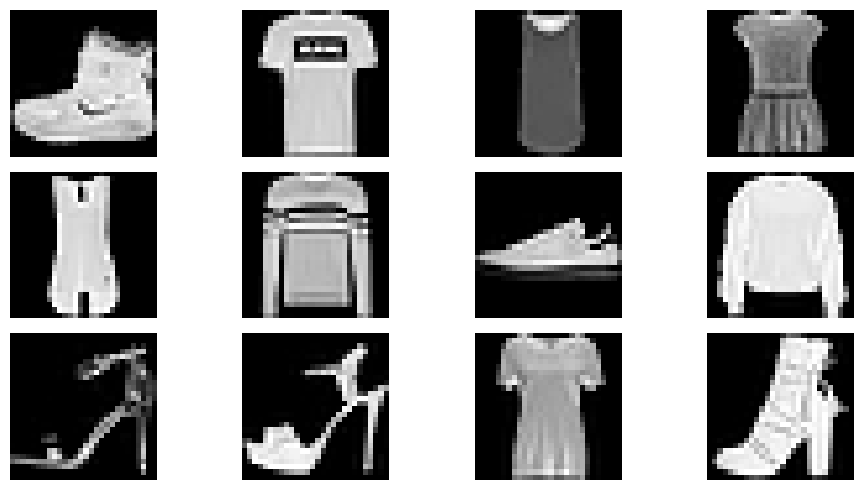

In [38]:
# Import necessary libraries
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Display the data shape
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# Visualize some images from the dataset
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


The code loads the Fashion MNIST dataset using TensorFlow, splitting it into training and test sets while ignoring the labels. It then shows 12 sample images from the training set in a grid, displaying grayscale pictures of fashion items like T-shirts, shoes, and dresses. Axis labels are turned off to focus on the images, giving a quick visual overview of the data the model will use.

### Transform the Data

Normalize pixel values to a range of [0, 1].
Reshape the images to include a channel dimension (required for CNNs).


In [39]:
# Normalize pixel values to [0, 1]
# Scale pixel values from 0–255 to 0–1 for faster training
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to include a channel dimension
# Reshape images to (height, width, channels); channel=1 for grayscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Show the final shape of data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


The pixel values of the images are normalized to the range [0, 1] by dividing the raw pixel values (ranging from 0 to 255) by 255. This step ensures that the model can train more efficiently, as neural networks generally perform better with normalized inputs.

The data is then reshaped to include a **channel dimension** for compatibility with convolutional layers. The images, initially with shape `(28, 28)`, are reshaped to `(28, 28, 1)`, where `1` represents the single color channel (grayscale).

Finally, the new shapes of the training and test datasets are printed, confirming that the images are now properly preprocessed and ready for model input.

### Build and Train the Autoencoder

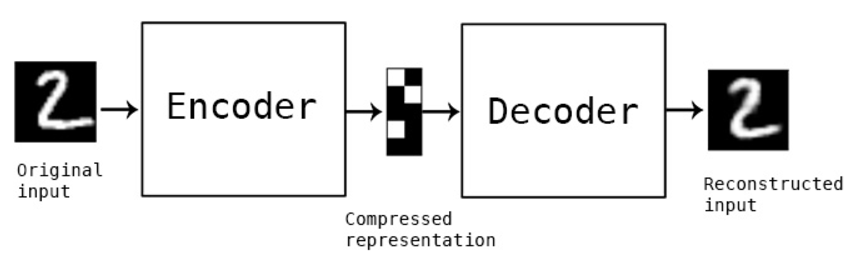

#### Step 1: Define the Autoencoder Architecture

An Autoencoder consists of two parts:

- Encoder: Compresses the input image into a latent representation.
- Decoder: Reconstructs the image from the latent representation.

In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Encoder: Compresses the input image into a latent representation
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder: Reconstructs the image from the latent representation
x = Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

# Build the Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the Autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

This code defines a Convolutional Autoencoder with two main parts: the encoder and the decoder.

- **Encoder:** It takes a 28x28 grayscale image and applies two convolutional layers with ReLU activation, followed by max-pooling to shrink the image. This extracts key features and compresses the input into a smaller "encoded" representation.

- **Decoder:** Starting from the encoded layer, it uses convolutional layers and upsampling to reconstruct the image back to its original size. The final layer uses sigmoid activation to produce the reconstructed image.

The model is compiled with the Adam optimizer and binary cross-entropy loss, suitable for reconstructing images with pixel values between 0 and 1. The summary() function shows the layer structure and number of parameters, preparing the model for training.

#### Step 2: Train the Model
Train the Autoencoder to reconstruct normal images from the dataset.

In [41]:
# Train the Autoencoder
history = autoencoder.fit(
    x_train, x_train,          # Input and target are the same for autoencoders
    epochs=10,                 # Train for 10 complete passes over the data
    batch_size=128,            # Number of samples per gradient update
    validation_split=0.2       # Use 20% of training data for validation
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 185ms/step - loss: 0.2965 - val_loss: 0.2732
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - loss: 0.2687 - val_loss: 0.2686
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 67s 178ms/step - loss: 0.2637 - val_loss: 0.2628
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 66s 177ms/step - loss: 0.2601 - val_loss: 0.2603
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 66s 176ms/step - loss: 0.2577 - val_loss: 0.2588
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 192ms/step - loss: 0.2560 - val_loss: 0.2567
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 68s 181ms/step - loss: 0.2548 - val_loss: 0.2555
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 184ms/step - loss: 0.2539 - val_loss: 0.2548
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 192ms/step - loss: 0.2532 - val_loss: 0.2544
Epoch 10/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 69s 183ms/step - loss: 0.2526 - val_loss: 0.2537


This code trains the Autoencoder on the Fashion MNIST dataset. The model learns to reconstruct its input, so x_train is used as both input and target. Training runs for 10 epochs with a batch size of 128, processing 128 images at a time. 20% of the training data is kept for validation to check performance on unseen examples. The history object records training and validation loss for each epoch, which can be used to track learning progress.

#### Step 3: Evaluate the model

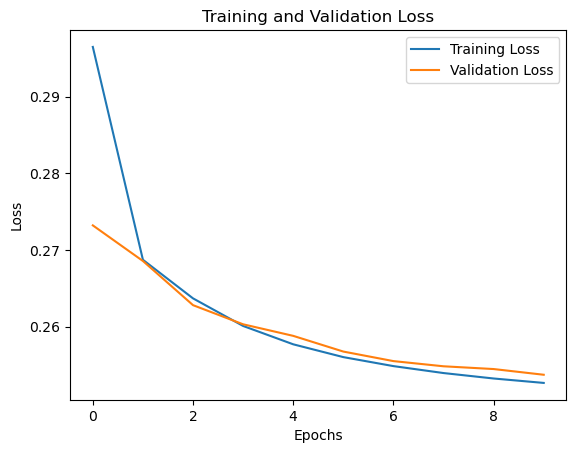

In [42]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This code plots the training and validation loss throughout the training process. `history.history['loss']` and `history.history['val_loss']` store the loss values for each epoch on the training and validation sets. The plot shows how the model’s performance changes over time.

Training loss reflects how well the model fits the training data, while validation loss indicates its ability to generalize to new data. Comparing the two helps identify overfitting (training loss drops but validation loss rises) or effective learning.

### Anomaly Detection

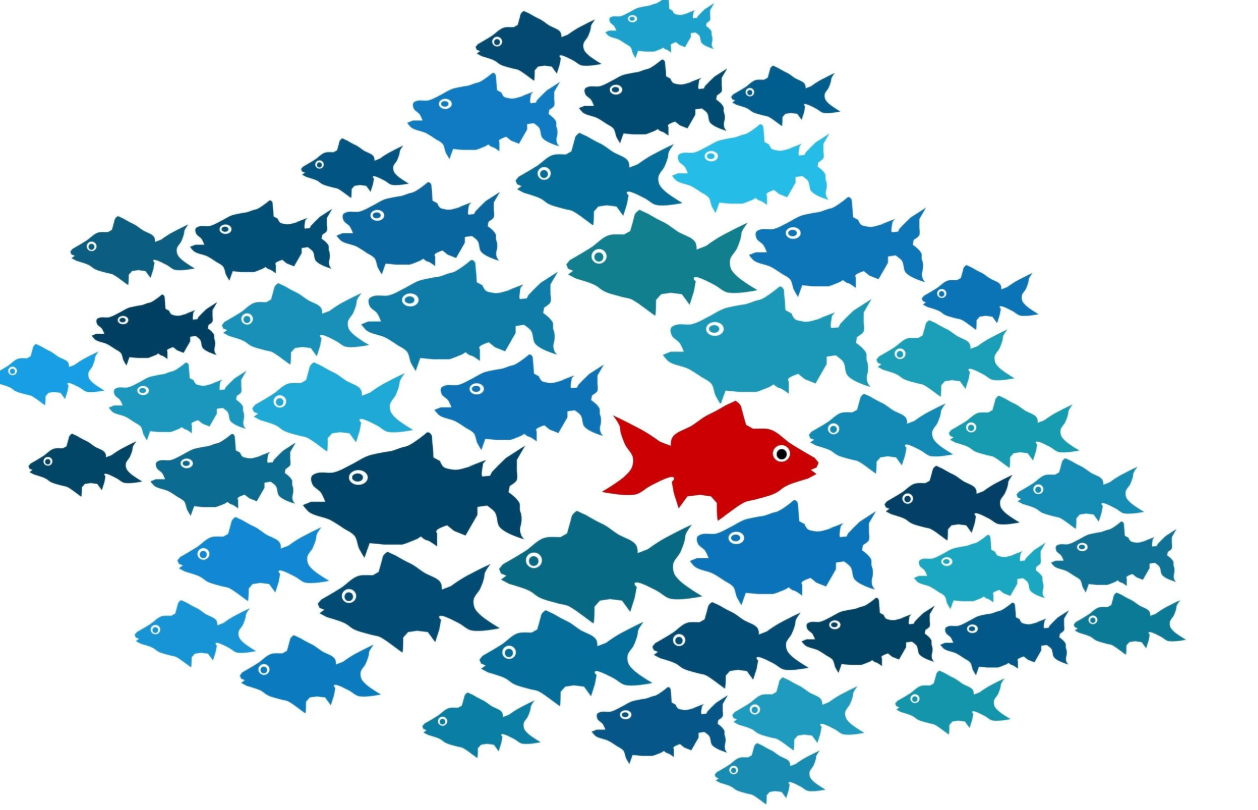

#### Step1: Simulate Anomalies

- To test the model, we artificially introduce noise or occlusion into some test images.

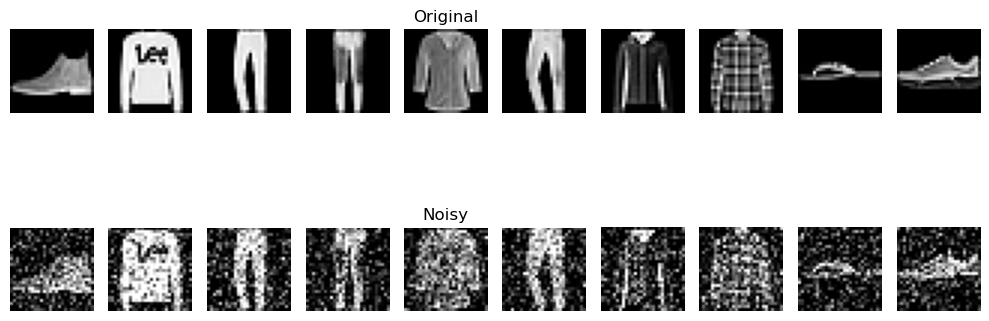

In [43]:
# Add Gaussian noise to the test images
x_test_noisy = x_test + np.random.normal(0, 0.3, x_test.shape)  # Add random noise with mean=0 and std=0.3
x_test_noisy = np.clip(x_test_noisy, 0., 1.)                    # Ensure pixel values stay between 0 and 1

# Visualize the original and noisy images side by side
plt.figure(figsize=(10, 5))
for i in range(10):
    # Original images
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 4:
        plt.title("Original")
    
    # Noisy images
    plt.subplot(2, 10, i + 11)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 4:
        plt.title("Noisy")

plt.tight_layout()
plt.show()

This code adds Gaussian noise to the test images by combining random values (mean 0, standard deviation 0.3) with the original pixels. The noisy images are clipped to keep pixel values between 0 and 1.

A visual comparison is then created: the **original images** appear on the top row, and the **noisy images** on the bottom row. Titles "Original" and "Noisy" are added for clarity. This shows how noise affects image quality and sets up the task for the autoencoder to denoise them.

#### Step2: Reconstruct Noisy Images

- Use the trained Autoencoder to reconstruct both normal and noisy images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


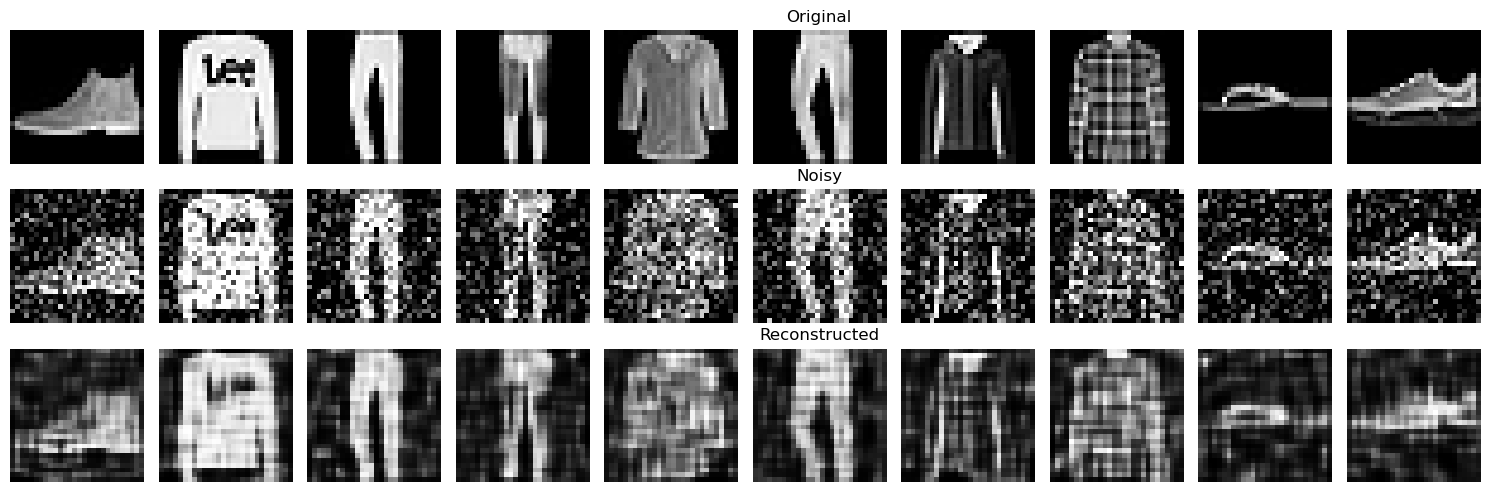

In [49]:
# Reconstruct noisy images using the trained autoencoder
reconstructed = autoencoder.predict(x_test_noisy)

# Visualize original, noisy, and reconstructed images side by side
n = 10
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original images (top row)
    plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == n // 2:
        plt.title("Original")
    
    # Noisy images (middle row)
    plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == n // 2:
        plt.title("Noisy")
    
    # Reconstructed images (bottom row)
    plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == n // 2:
        plt.title("Reconstructed")

plt.tight_layout()
plt.show()

This code reconstructs the **noisy test images** using the trained autoencoder. The `autoencoder.predict(x_test_noisy)` function applies the autoencoder model to the noisy images, attempting to denoise them and restore them to their original form.

A comparison is visualized across **three rows** for 10 test images:
1. The **original images** (top row) show the clean, unaltered test samples.
2. The **noisy images** (middle row) display the images with the added Gaussian noise.
3. The **reconstructed images** (bottom row) show how well the autoencoder has been able to denoise the noisy images.

This visualization demonstrates how the autoencoder learns to clean up noisy inputs, showcasing its ability to recover the original image quality despite the added disturbances.

#### Step3: Measure Reconstruction Errors

- Reconstruction errors are calculated as the pixel-wise difference between the original and reconstructed images.

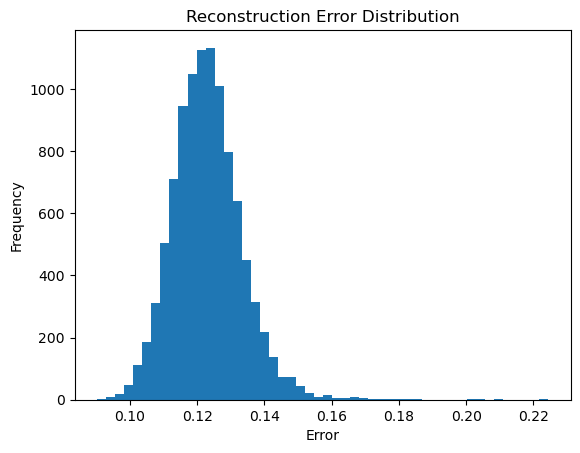

In [51]:
# Compute reconstruction errors for each test image
reconstruction_errors = np.mean(np.abs(x_test - reconstructed), axis=(1, 2, 3))

# Plot a histogram of the reconstruction errors
plt.hist(reconstruction_errors, bins=50, label='Reconstruction Error')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.show()

This code computes **reconstruction errors** by taking the absolute difference between the original images (x_test) and the reconstructed images (reconstructed). `np.mean(np.abs(x_test - reconstructed), axis=(1, 2, 3))` calculates the average pixel-wise error for each image, giving one error value per image.

A **histogram** is then plotted to show the distribution of these errors. The x-axis shows the error magnitude, and the y-axis shows how often each error occurs. This helps visualize how well the autoencoder reconstructs images, with few high-error cases indicating successful reconstruction.

#### Step 4: Set a threshold for anomaly detection based on reconstruction error.

In [56]:
# Compute mean and standard deviation of reconstruction errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Set threshold as mean + 2*std (k can be 2, 3, etc.)
possible_threshold = mean_error + 2 * std_error
print(f"Suggested threshold: {possible_threshold}")


Suggested threshold: 0.143597453851665


In [57]:
# Set threshold as the 95th percentile of reconstruction errors
possible_threshold = np.percentile(reconstruction_errors, 95)
print(f"Suggested threshold: {possible_threshold}")


Suggested threshold: 0.14011120930776627


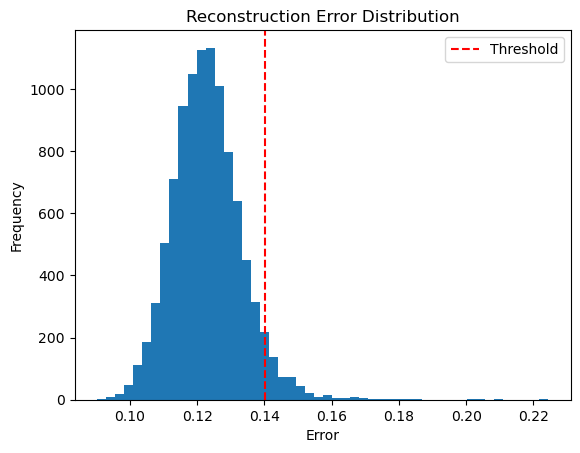

In [58]:
plt.hist(reconstruction_errors, bins=50)
plt.axvline(possible_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()


In [59]:
# Set a threshold for reconstruction error to classify anomalies
threshold = 0.14

# Identify images with reconstruction error above the threshold
anomalies = reconstruction_errors > threshold

# Print the total number of detected anomalies
print(f"Number of anomalies detected: {np.sum(anomalies)}")


Number of anomalies detected: 513


This code defines an anomaly detection threshold and flags test images as anomalies if their reconstruction error exceeds 0.1. `reconstruction_errors > threshold` produces a boolean array, where `True` means an anomaly and `False` means a normal image.

It then counts and prints the total number of detected anomalies by summing the `True` values. This shows how many images the model considers unusual, helping evaluate its ability to identify outliers.

### Conclusion

We used Autoencoders for anomaly detection:

- **Trained an Autoencoder** to learn a compressed representation of normal images and reconstruct them.

- **Measured reconstruction errors** to detect anomalies, where higher errors indicated images that differed from the training data.

- **Tested with noisy images**, showing how Autoencoders can identify unusual inputs, useful in applications like defect detection or fraud detection.

This demonstrates that Autoencoders are effective for spotting outliers, making them a powerful tool for unsupervised anomaly detection across various domains.